In [1]:
import tensorflow as tf
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2022-06-21 12:13:50.180916: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-21 12:13:50.183751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 12:13:50.183758: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Conv2D

Let's explore Conv2D object

In [3]:
conv2d = keras.layers.Conv2D(
    filters=1,
    kernel_size=(2, 2),
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
)

In [4]:
print('X_train shape:', X_train.shape)
x_train = np.expand_dims(X_train, -1).astype(float)
print('x_train shape with one channel:', x_train.shape)

X_train shape: (60000, 28, 28)
x_train shape with one channel: (60000, 28, 28, 1)


In [5]:
# Conv2D was design for batch, so to get the first item but keeping the righ shape (n_dim=4) use your_array[[i]]
conv_output = conv2d(x_train[[0]])
conv_output.shape

2022-06-21 12:13:52.941091: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:961] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-06-21 12:13:52.941221: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 12:13:52.941253: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-06-21 12:13:52.941279: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-06-21 12:13:52.941305: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

TensorShape([1, 27, 27, 1])

Let's play with kernel size, and padding.  
With `valid` parameters, the convolution use only the available data, and start the convolution from the beginning of data.

In [6]:
conv2d = keras.layers.Conv2D(
    filters=1,
    kernel_size=(2, 2),
    strides=(1, 1),
    padding='valid'
)

original dimension of the filter: (2, 2, 1, 1)


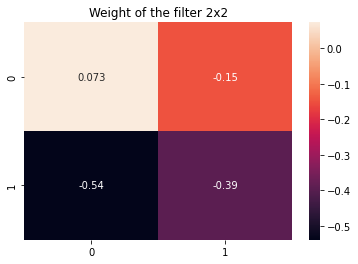

In [7]:
conv_output = conv2d(x_train[[0]])
print('original dimension of the filter:', conv2d.get_weights()[0].shape) # list because it could exist more than one filter
filter_to_plot = conv2d.get_weights()[0].reshape(2, 2) # reshape into 2, 2 to plot

sns.heatmap(filter_to_plot, annot=True)
plt.title('Weight of the filter 2x2');

Formula of output shape $\dfrac{(W−K+2P)}{S}+1$ with:  
- W  is the width/height size - here 28
- K is the Kernel size - here 2
- P is the padding - here 0
- S is the stride - here 1

so $\dfrac{(28−2+2*0)}{1}+1 = 27$

In [8]:
conv_output.shape

TensorShape([1, 27, 27, 1])

Great!!! We get the good dimension!

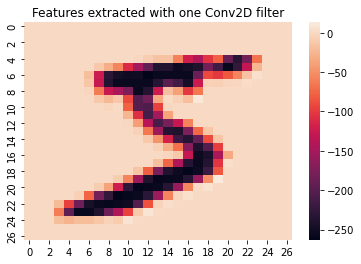

In [9]:
sns.heatmap(conv_output.numpy()[0].reshape(27, -1))
plt.title('Features extracted with one Conv2D filter');

Result of the Conv2D: $\sum_{i=0, j=0}^{ks_h, ks_w} conv\_weigh_{ij}*v_{k+i, l+j}$
- $ks_w$: kernel size for width (h for height)
- i, j: coordinates
- $v_{k,l}$: value of the image for k,l coordinates  

For multiple channel, it is the same, the calculation is the sum of every convolution for every channel.  
For 3D (so dimension [0, 1, 2]):


$\sum_{d=0}^{2}\sum_{i=0, j=0}^{ks_h, ks_w} conv\_weigh_{ij}*v_{k+i, l+j, d}$

In [10]:
conv_by_hand = x_train[0].reshape(28, 28)[14:16, 14:16] * filter_to_plot
print('Result of the convolution for the center of the image')
print('results by hand calculation:\n', np.sum(conv_by_hand))
shape = conv_output.numpy()[0].shape[0]
print('\n')
print('With Conv2D:\n', conv_output.numpy()[0].reshape(shape, -1)[14, 14])

Result of the convolution for the center of the image
results by hand calculation:
 -117.8145581483841


With Conv2D:
 -117.81456


original shape after convolution: (1, 24, 24, 1)


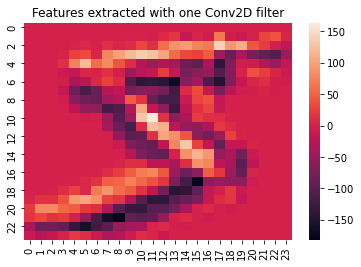

In [11]:
# CHANGE KERNEL SIZE
conv2d = keras.layers.Conv2D(
    filters=1,
    kernel_size=(5, 5),
    strides=(1, 1),
    padding='valid'
)

conv_output = conv2d(x_train[[0]])
print('original shape after convolution:', conv_output.shape)
shape = conv_output.shape[1]
sns.heatmap(conv_output.numpy()[0].reshape(shape, -1))
plt.title('Features extracted with one Conv2D filter');

original shape after convolution: (1, 8, 24, 1)


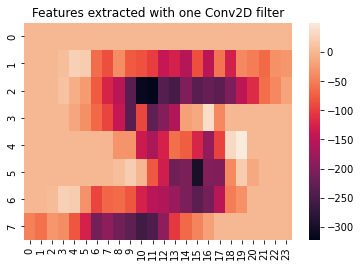

In [12]:
# CHANGE STRIDE
conv2d = keras.layers.Conv2D(
    filters=1,
    kernel_size=(5, 5),
    strides=(3, 1),
    padding='valid'
)

conv_output = conv2d(x_train[[0]])
print('original shape after convolution:', conv_output.shape)
shape = conv_output.shape[1]
sns.heatmap(conv_output.numpy()[0].reshape(shape, -1))
plt.title('Features extracted with one Conv2D filter');

Hooo, the size is not square!!  
- the strides are not the same for height (3) and width (1)

so for height: $\dfrac{(28−5+2*0)}{3}+1 = 8,6 \Rightarrow 8$  
and for width: $\dfrac{(28−5+2*0)}{1}+1 = 24$  

original shape after convolution: (1, 10, 28, 1)


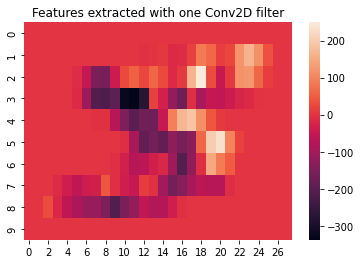

In [13]:
# CHANGE PADDING
conv2d = keras.layers.Conv2D(
    filters=1,
    kernel_size=(5, 5),
    strides=(3, 1),
    padding='same'
)

conv_output = conv2d(x_train[[0]])
print('original shape after convolution:', conv_output.shape)
shape = conv_output.shape[1]
sns.heatmap(conv_output.numpy()[0].reshape(shape, -1))
plt.title('Features extracted with one Conv2D filter');

Our shape have change. How the shapping is calculated:  
- $output\ spatial\ shape = ceil(\dfrac{input\ spatial\ shape}{stride}) = floor(\dfrac{input\ spatial\ shape}{stride}) + 1$  

so $output\ spatial\ shape \ for\ height = floor(\dfrac{28}{3}) + 1 = floor(9.3) + 1 = 9 +1 = 10$ 

# Pooling

Let's view pooling. Let's see only max as all other poolings follow the same principles.

In [14]:
max_pool_2d = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=None,
    padding='valid',
    data_format=None,
)

In [15]:
print('original shape of convolution output:', conv_output.shape)
pooled_output = max_pool_2d(conv_output)
print('after pooling:', pooled_output.shape)

original shape of convolution output: (1, 10, 28, 1)
after pooling: (1, 5, 14, 1)


In [16]:
# when is strides is none, it takes the pool_size as stride values
max_pool_2d = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=(2, 2), # <== let's be explicit
    padding='valid',
    data_format=None,
)

original shape of convolution output: (1, 10, 28, 1)
after pooling: (1, 5, 14, 1)


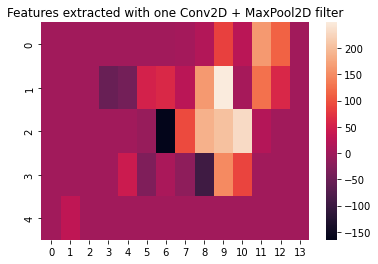

In [17]:
print('original shape of convolution output:', conv_output.shape)
pooled_output = max_pool_2d(conv_output)
print('after pooling:', pooled_output.shape)
shape = pooled_output.shape[1]
sns.heatmap(pooled_output.numpy()[0].reshape(shape, -1))
plt.title('Features extracted with one Conv2D + MaxPool2D filter');

In [18]:
# when is strides is none, it takes the pool_size as stride values
max_pool_2d = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=(5, 3), # <== let's be explicit
    padding='valid',
    data_format=None,
)

original shape of convolution output: (1, 10, 28, 1)
after pooling: (1, 2, 9, 1)


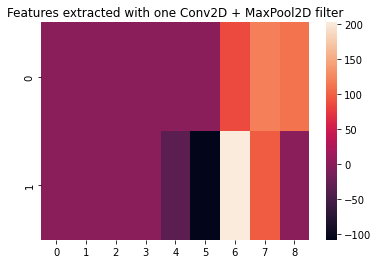

In [19]:
print('original shape of convolution output:', conv_output.shape)
pooled_output = max_pool_2d(conv_output)
print('after pooling:', pooled_output.shape)
shape = pooled_output.shape[1]
sns.heatmap(pooled_output.numpy()[0].reshape(shape, -1))
plt.title('Features extracted with one Conv2D + MaxPool2D filter');

Formula of output shape $floor(\dfrac{W}{max(K, S)})$ with:  
- W  is the width/height size - here (10, 28)
- K is the Kernel size - here (2, 2)
- P is the padding - here 0
- S is the stride - here (5, 3)

so for height: $floor(\dfrac{10}{max(2, 5)}=\dfrac{10}{5}) = 2$  
so for width: $floor(\dfrac{10}{max(2, 3)}=\dfrac{28}{3}) = floor(9.3) = 9 $  

Let's play with a kernel higher than the stride.

In [20]:
# when is strides is none, it takes the pool_size as stride values
max_pool_2d = tf.keras.layers.MaxPool2D(
    pool_size=(7, 4),
    strides=(5, 3), # <== let's be explicit
    padding='valid',
    data_format=None,
)

original shape of convolution output: (1, 10, 28, 1)
after pooling: (1, 1, 9, 1)


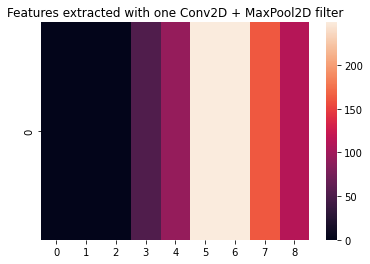

In [21]:
print('original shape of convolution output:', conv_output.shape)
pooled_output = max_pool_2d(conv_output)
print('after pooling:', pooled_output.shape)
shape = pooled_output.shape[1]
sns.heatmap(pooled_output.numpy()[0].reshape(shape, -1))
plt.title('Features extracted with one Conv2D + MaxPool2D filter');

And try with strides of (1, 1)

original shape of convolution output: (1, 10, 28, 1)
after pooling: (1, 9, 27, 1)


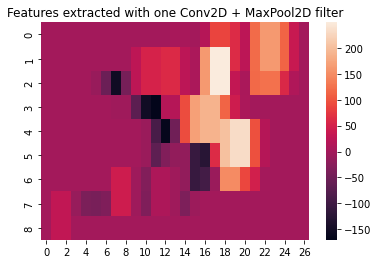

In [22]:
# with strides = (1, 1) and kernel (2, 2)
max_pool_2d = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=(1, 1), # <== let's be explicit
    padding='valid',
    data_format=None,
)

print('original shape of convolution output:', conv_output.shape)
pooled_output = max_pool_2d(conv_output)
print('after pooling:', pooled_output.shape)
shape = pooled_output.shape[1]
sns.heatmap(pooled_output.numpy()[0].reshape(shape, -1))
plt.title('Features extracted with one Conv2D + MaxPool2D filter');

original shape of convolution output: (1, 10, 28, 1)
after pooling: (1, 10, 28, 1)


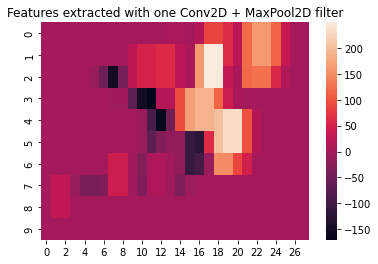

In [23]:
# with strides = (1, 1) and kernel (2, 2) and PADDING ??
max_pool_2d = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
    strides=(1, 1), # <== let's be explicit
    padding='same', # <== put padding
    data_format=None,
)

print('original shape of convolution output:', conv_output.shape)
pooled_output = max_pool_2d(conv_output)
print('after pooling:', pooled_output.shape)
shape = pooled_output.shape[1]
sns.heatmap(pooled_output.numpy()[0].reshape(shape, -1))
plt.title('Features extracted with one Conv2D + MaxPool2D filter');

# GREAT! you know everything about Conv2D and Padding, play with, redo calculation with small dimension if you're doubting anything.